HOST_RESPONSE_RATE:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [2]:
import pandas as pd

# Cargar únicamente la columna 'id' del archivo CSV

file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['host_acceptance_rate'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'id' existe en el DataFrame
if 'host_acceptance_rate' in data.columns:
    # Tipo de dato
    tipo_dato = data['host_acceptance_rate'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['host_acceptance_rate'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['host_acceptance_rate'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['host_acceptance_rate'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['host_acceptance_rate'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'host_acceptance_rate':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'host_acceptance_rate' no existe en el DataFrame.")

Columna 'host_acceptance_rate':
 - Tipo de dato: float64
 - Cantidad de nulos: 113087
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 101
 - Cantidad de datos totales: 279712


In [3]:
nulos = data['host_acceptance_rate'].isna().sum()
ceros = (data['host_acceptance_rate'] == 0).sum()
print(f"Nulos: {nulos}")
print(f"Ceros: {ceros}")
print(f"Total eliminados: {nulos + ceros}")


Nulos: 113087
Ceros: 11431
Total eliminados: 124518


In [2]:
print(data['host_acceptance_rate'].describe())
print(data['host_acceptance_rate'].value_counts().sort_index())

count    166625.000000
mean          0.827168
std           0.289202
min           0.000000
25%           0.780000
50%           0.980000
75%           1.000000
max           1.000000
Name: host_acceptance_rate, dtype: float64
host_acceptance_rate
0.00    11431
0.01       25
0.02       14
0.03       34
0.04       49
        ...  
0.96     3287
0.97     4523
0.98     5085
0.99     7227
1.00    75555
Name: count, Length: 101, dtype: int64


Analisis Cuantitativo

ANALISIS CUANTITATIVO ESCALA NATURAL

CON OUTLIERS 

In [7]:
# Cantidad de filas antes de aplicar el filtro
total_antes = data['host_acceptance_rate'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores iguales a 0
valores_validos = data['host_acceptance_rate'].dropna()

# Cantidad de filas después de filtrar
total_despues = valores_validos.shape[0]

# Calcular cuántos valores se eliminaron (nulos o 0)
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (dropeados): {valores_dropeados}")

if not valores_validos.empty:
    # Cálculo de estadísticas en escala natural
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'host_acceptance_rate' (escala natural, excluyendo valores 0):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar un análisis cuantitativo.")


Cantidad de valores eliminados (dropeados): 113087

Análisis Cuantitativo de 'host_acceptance_rate' (escala natural, excluyendo valores 0):
 - Promedio: 0.83
 - Mínimo: 0.0
 - Máximo: 1.0
 - Desviación estándar: 0.29
 - Q1 (25%): 0.78
 - Q2 / Mediana (50%): 0.98
 - Q3 (75%): 1.0
 - Q4 (100%): 1.0
 - Varianza: 0.08363808297686119
 - Curtosis (Kurtosis): 2.3544
 - Asimetría (Skewness): -1.8638


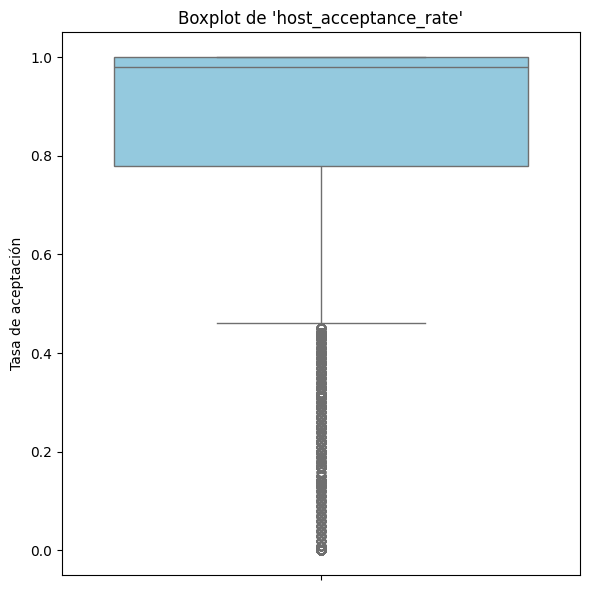

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Filtrar valores válidos (excluye solo nulos)
valores_validos = data['host_acceptance_rate'].dropna()

# Dibujar boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_validos, color='skyblue')
plt.title("Boxplot de 'host_acceptance_rate'")
plt.ylabel("Tasa de aceptación")
plt.tight_layout()
plt.show()


Según los análisis realizados sobre la variable host_acceptance_rate, los datos presentan una distribución concentrada en valores altos, con una mediana de 0.98 y un promedio de 0.83. Aunque no se detectan valores atípicos superiores debido al rango natural de la variable (entre 0 y 1), sí se observa una pequeña proporción de valores inferiores a 0.45 que, estadísticamente, podrían considerarse atípicos. Sin embargo, estos valores reflejan tasas reales de aceptación bajas por parte de algunos anfitriones, por lo que se consideran válidos. Se recomienda no eliminarlos del conjunto de datos, pero sí tenerlos en cuenta en los análisis posteriores, ya que podrían representar comportamientos específicos que afecten la experiencia del usuario o el desempeño de los modelos predictivos.

ANALISIS CUANTITATIVO SIN OUTLIERS PARA ANALIZAR DIFERENCIAS CON OUTLIERS Y SIN OUTLIERS

In [3]:
# 1. Filtrar valores válidos: eliminar nulos y valores 0
valores_validos = data['host_acceptance_rate'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 2. Cálculo de IQR y límites
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 3. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 4. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 5. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 6. Mostrar resultados
    print(f"Cantidad de outliers detectados: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'host_acceptance_rate' (escala natural, sin outliers):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados: 17953

Análisis Cuantitativo de 'host_acceptance_rate' (escala natural, sin outliers):
 - Promedio: 0.95
 - Mínimo: 0.65
 - Máximo: 1.0
 - Desviación estándar: 0.09
 - Q1 (25%): 0.93
 - Q2 / Mediana (50%): 1.0
 - Q3 (75%): 1.0
 - Varianza: 0.0080
 - Curtosis (Kurtosis): 2.1376
 - Asimetría (Skewness): -1.7939


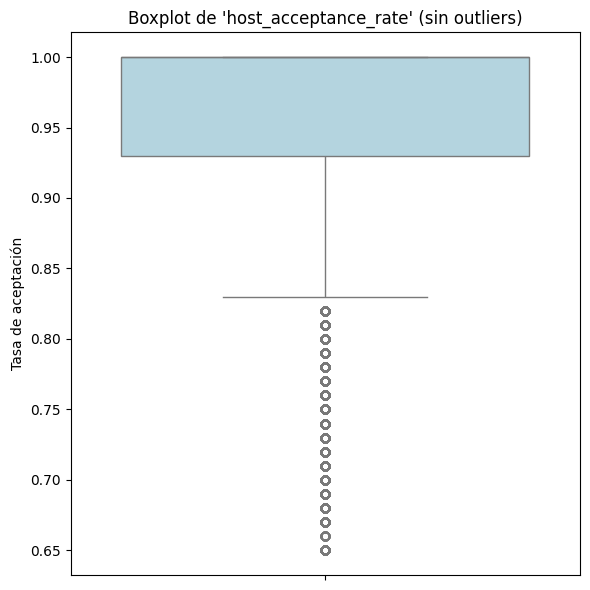

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reutilizamos los datos filtrados (sin nulos, sin ceros, sin outliers)
valores_validos = data['host_acceptance_rate'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cálculo del IQR
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'host_acceptance_rate' (sin outliers)")
plt.ylabel("Tasa de aceptación")
plt.tight_layout()
plt.show()
